<a href="https://colab.research.google.com/github/ramanakshay/Optimal-Transport/blob/main/notebooks/multi_marginal_ot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-Marginal Optimal Transport

## Import Libraries

In [126]:
!pip install pot  # Pip Installs Packages

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [127]:
user = 'ramanakshay'
repo = 'Optimal-Transport'

url = f"git+https://github.com/{user}/{repo}.git"
!pip install --upgrade {url}

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/ramanakshay/Optimal-Transport.git to /tmp/pip-req-build-pg2rmcvo
  Running command git clone -q https://github.com/ramanakshay/Optimal-Transport.git /tmp/pip-req-build-pg2rmcvo


In [128]:
import numpy as np 

import matplotlib.pyplot as plt # plotting

import ot  # ot
import ot.plot
from prettytable import PrettyTable

import time # measure time
from numpy import random

In [129]:
from utils.plot import plot_matrix,plot_2d_map
from utils.dist import find_cost_matrix,find_cost_matrix_old

##Coulomb Cost

In [262]:
M = np.array([[1,2],[3,4]])
u = np.array([1,2])
b = np.zeros((2,2,2))
v = u.reshape(1,1,2)
print(v[0][0][1])
s = v + b
s += v
print(s[0][1][0])

2
2.0


In [131]:
def gaussian_mix(n,mu,std,scale = None):
  assert len(mu) == len(std)
  if scale == None:
    scale = [1]*len(mu)
  x = np.arange(n, dtype = np.float64)
  h = 0
  for i in range(len(mu)):
    h += np.exp(-(x - mu[i]) ** 2 / (2 * std[i] ** 2))*scale[i]
  return h / h.sum()

In [265]:
def find_cost_tensor(n,X,p = 1):
  C = np.zeros((size,)*n)
  for i in range(n):
    for j in range(n):
      if i < j:
        shape = [1]*n
        shape[i] = shape[j] = size
        shape = tuple(shape)
        print(shape)
        C += find_cost_matrix_old(X[i].reshape(size,1),X[j].reshape(size,1),1,dist=("coulomb",1)).reshape(shape)
  return C

In [278]:
def sinkhorn(A,C,epsilon,niter):
  n = A.shape[0]
  size = A.shape[1]

  u = np.ones((n,size))
  K = np.exp(-C/epsilon)

  for it in range(niter):
    for i in range(n):
      prod = np.copy(K)
      for j in range(n):
        if (j != i):
          shape = [1]*n
          shape[j] = size
          shape = tuple(shape)
          prod *= u[j].reshape(shape)
          print(shape)

      axes = list(range(n))
      axes.remove(i)
      axes = tuple(axes)
      print(axes)
      prod = np.sum(prod,axis = axes)
      print(prod.shape)
      print()
      u[i] = A[i] / prod
  
  P = np.copy(K)
  print(P.shape)
  for i in range(n):
    shape = [1]*n
    shape[i] = size
    shape = tuple(shape)
    print(shape)
    P *= u[i].reshape(shape)
  
  return P

In [279]:
n = 3
size = 100

A = np.empty((n,size), float)
A[0] = gaussian_mix(size,[10,50],[5,15],[2,1])
A[1] = gaussian_mix(size,[15,60],[7,10],[1.5,1])
A[2] = gaussian_mix(size,[20,80],[10,5],[1,1])

x = np.array([[i,] for i in range(size)]) # defining the space
X = np.tile(x.T,(n,1))

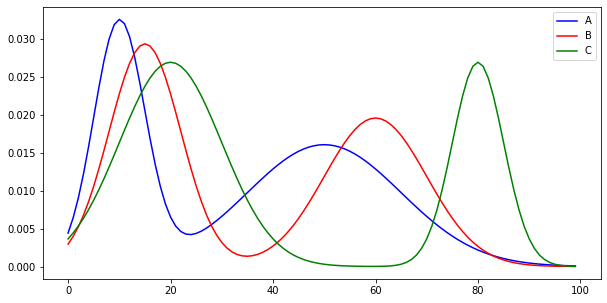

In [280]:
#Plot distributions
plt.figure(figsize=(10, 5))
plt.plot(x, A[0], 'b', label='A')
plt.plot(x, A[1], 'r', label='B')
plt.plot(x, A[2], 'g', label='C')
plt.legend()
plt.show()

In [281]:
C = find_cost_tensor(n,X)
print(C.shape)

(100, 100, 100)
(100, 100, 1)
(100, 1, 100)
(1, 100, 100)
(100, 100, 100)


(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

(100, 1, 1)
(1, 1, 100)
(

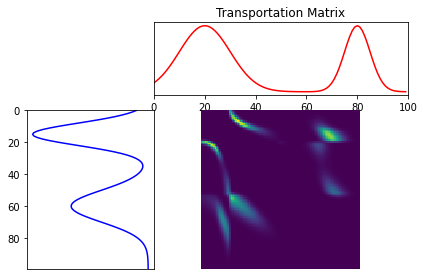

In [286]:
P = sinkhorn(A,C,1e-3,100)
Pxz = np.sum(P,axis = 0)
ot.plot.plot1D_mat(A[1], A[2], Pxz, 'Transportation Matrix')

(1, 100, 1)
(1, 1, 100)
(1, 2)
(100,)

U0 0.9998999997740322
(100, 1, 1)
(1, 1, 100)
(0, 2)
(100,)

U1 -99.00002118512951
(100, 1, 1)
(1, 100, 1)
(0, 1)
(100,)

U2 -99.00000814758712
(100, 100, 100)
(100, 1, 1)
(1, 100, 1)
(1, 1, 100)
(100, 100, 100)
(100,)


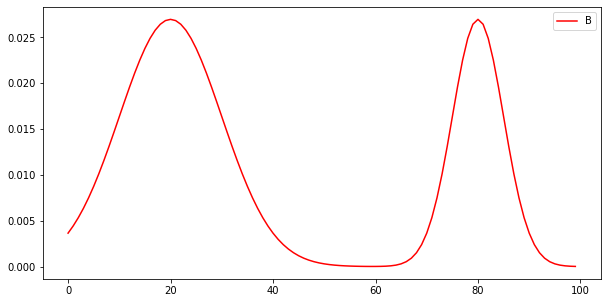

In [276]:
P = sinkhorn(A,C,100000,1)
print(P.shape)
P1 = np.sum(P,axis = (0))
print(A[2].shape)
plt.figure(figsize=(10, 5))
plt.plot(x, A[2], 'b', label='A')
plt.plot(x, P1, 'r', label='B')
plt.legend()
plt.show()
#ot.plot.plot1D_mat(A[0], A[1], P_01, 'Transportation Matrix')

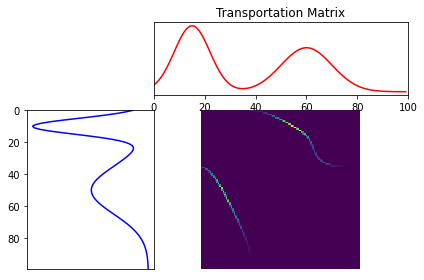

In [158]:
Ce = find_cost_matrix(x,x,1,dist = ("coulomb",1))
Pe = ot.emd(A[0],A[1],Ce)
ot.plot.plot1D_mat(A[0], A[1], Pe, 'Transportation Matrix')

In [ ]:
a = np.array([[1,2,3],])
b = np.array([1,2,3],[4,5,6]).reshape(3,2)
np.dot(b,a)

TypeError: ignored